<a href="https://colab.research.google.com/github/Wikanda-Hongboonmee/DWDM21/blob/main/Chapter_6_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # pandas เป็น Package ที่ใช้เกี่ยวกับการจัดการข้อมูลที่เป็นตาราง , เรียกใช้โดยการ import แล้วตามด้วยชื่อ Package

In [2]:
from google.colab import drive  # เชื่อมต่อกับ google drive ที่เราเก็บข้อมูลไว้
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os # เป็น package ที่เอาไว้จัดการไฟล์และเอาไว้ดูที่มาของไฟล์หรือ path

In [4]:
path = '/content/drive/My Drive/DWDM2021_DATA'

In [5]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin1')
# ไฟล์ที่เราต้องการ # Encoding ให้เป็น latin1
data  # print data ดูว่ามันหน้าตาเป็นยังไง

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


**มีประเทศสาขาของ Supermarket นี้ทั้งหมดกี่ประเทศ**

In [6]:
all_country = set(data['Country']) # ดูว่ามีประเทศอะไรบ้าง
all_country

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

In [7]:
len(set(data['Country'])) # ดูว่ามีทั้งหมดกี่ประเทศ

38

### **HW 13** 
วาดกราฟสรุปจำนวน items และยอดขายของแต่ละประเทศ

In [10]:
Sales = data['Quantity'] * data['UnitPrice']
Sales

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Length: 541909, dtype: float64

In [21]:
data = data.assign(Sales=Sales.values)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


In [22]:
group_data = data.groupby('Country')
group_data.first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
Country,,,,,,,,
Australia,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,12/01/2010 10:03,8.50,12431.0,51.00
Austria,C538971,22153,ANGEL DECORATION STARS ON DRESS,-48,12/15/2010 11:39,0.42,12865.0,-20.16
Bahrain,539500,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,54,12/20/2010 11:02,3.81,12355.0,205.74
Belgium,537026,84375,SET OF 20 KIDS COOKIE CUTTERS,12,12/03/2010 16:35,2.10,12395.0,25.20
Brazil,550201,22423,REGENCY CAKESTAND 3 TIER,16,4/15/2011 10:25,10.95,12769.0,175.20
Canada,546533,20886,BOX OF 9 PEBBLE CANDLES,12,3/14/2011 13:53,1.95,15388.0,23.40
Channel Islands,538002,22690,DOORMAT HOME SWEET HOME BLUE,2,12/09/2010 11:48,7.95,14932.0,15.90
Cyprus,538826,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,12/14/2010 12:58,2.55,12370.0,163.20
Czech Republic,545072,22930,BAKING MOULD HEART MILK CHOCOLATE,18,2/28/2011 8:43,2.55,12781.0,45.90


In [23]:
import numpy as np

In [28]:
from matplotlib import pyplot as plt

TypeError: ignored

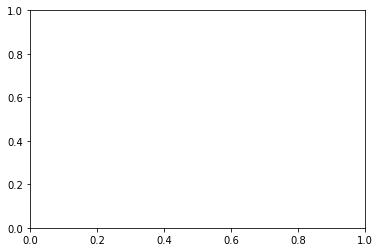

In [39]:
width = 0.35

plt.bar(np.arange(len(group_data['Quantity'])) - width/2, group_data['Quantity'], width=width, label = 'Quantity')
plt.bar(np.arange(len(group_data['Quantity'])) + width/2, group_data['Sales'], width=width, label = 'Sales')

#plt.ylabel('Quantity')
#plt.title('Compare positive vs total testing')
#plt.xticks(np.arange(len(group_data['Quantity']),group_data['Country'], rotation = -90)
#plt.legend();